In [24]:
#from datetime import datetime, timezone
#import glob

import matplotlib.pyplot as plt
import numpy as np
#import pandas as pd
import seaborn as sns

#import double_edge_swap as des

### Distance matrix in a 3D ellipsoid

In [41]:
# Generates a grid of evenly spaced points in the unit cube centered at the origin
number_of_points = 11
x = np.linspace(-0.5, 0.5, number_of_points)
xs = np.array(np.meshgrid(x, x, x))
coordinates = np.transpose(xs.reshape((3,-1)))
coordinates[:, [0, 1]] = coordinates[:, [1, 0]]

print(coordinates.shape)

# Keeps 'number_of_vertices' points that are within a ellipsoid with semi-axes a, a, c
number_of_vertices = 100
a, c = 0.3, 0.5
coordinates = coordinates[np.where((coordinates[:, 0] / a) ** 2 + (coordinates[:, 1] / a) ** 2 + (coordinates[:, 2] / c) ** 2 <= 1)[0]]
assert len(coordinates) >= number_of_vertices, "Not enough points in ellipsoid"
coordinates = coordinates[np.random.choice(coordinates.shape[0], number_of_vertices, replace=False)]

# Builds the distance matrix
x = coordinates[:, 0]
y = coordinates[:, 1]
z = coordinates[:, 2]
distance_matrix = np.sqrt(np.square(x - x[:, np.newaxis]) + np.square(y - y[:, np.newaxis]) + np.square(z - z[:, np.newaxis]))

min_distance = 0
max_distance = 2*c

normalized_distance_matrix = (distance_matrix - min_distance) / (max_distance - min_distance)
x = normalized_distance_matrix

(1331, 3)


### Linear profiles

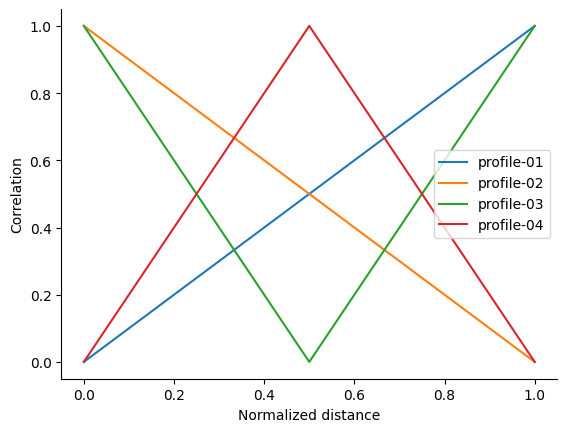

In [83]:
fig, ax = plt.subplots()

xx = np.linspace(0, 1, 101)

name = r"profile-01"
y  = x
yy = xx
np.savetxt(f"../data/synthetic/synthetic_correlation_matrices/correlation-matrix-{name}.txt", y, fmt='%.6f')
ax.plot(xx, yy, label=name)

name = r"profile-02"
y  = 1 - x
yy = 1 - xx
np.savetxt(f"../data/synthetic/synthetic_correlation_matrices/correlation-matrix-{name}.txt", y, fmt='%.6f')
ax.plot(xx, yy, label=name)

name = r"profile-03"
y  = np.abs(2 * x  - 1)
yy = np.abs(2 * xx - 1)
np.savetxt(f"../data/synthetic/synthetic_correlation_matrices/correlation-matrix-{name}.txt", y, fmt='%.6f')
ax.plot(xx, yy, label=name)

name = r"profile-04"
y  = 1 - np.abs(2 * x  - 1)
yy = 1 - np.abs(2 * xx - 1)
np.savetxt(f"../data/synthetic/synthetic_correlation_matrices/correlation-matrix-{name}.txt", y, fmt='%.6f')
ax.plot(xx, yy, label=name)

ax.set_xlabel("Normalized distance")
ax.set_ylabel("Correlation")

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.legend()
fig.savefig("../figures/profiles-01-02-03-04.pdf")

### Exponential profiles

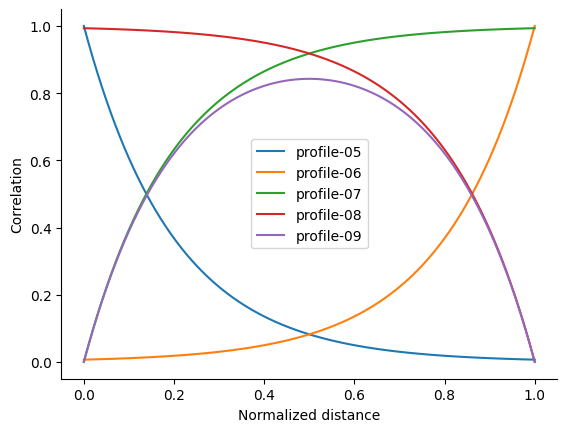

In [84]:
fig, ax = plt.subplots()

xx = np.linspace(0, 1, 101)

name = r"profile-05"
y  = np.exp(-5 * x)
yy = np.exp(-5 * xx)
np.savetxt(f"../data/synthetic/synthetic_correlation_matrices/correlation-matrix-{name}.txt", y, fmt='%.6f')
ax.plot(xx, yy, label=name)

name = r"profile-06"
y  = np.exp(-5 * (1 - x))
yy = np.exp(-5 * (1 - xx))
np.savetxt(f"../data/synthetic/synthetic_correlation_matrices/correlation-matrix-{name}.txt", y, fmt='%.6f')
ax.plot(xx, yy, label=name)

name = r"profile-07"
y  = 1 - np.exp(-5 * x)
yy = 1 - np.exp(-5 * xx)
np.savetxt(f"../data/synthetic/synthetic_correlation_matrices/correlation-matrix-{name}.txt", y, fmt='%.6f')
ax.plot(xx, yy, label=name)

name = r"profile-08"
y  = 1 - np.exp(-5 * (1 - x))
yy = 1 - np.exp(-5 * (1 - xx))
np.savetxt(f"../data/synthetic/synthetic_correlation_matrices/correlation-matrix-{name}.txt", y, fmt='%.6f')
ax.plot(xx, yy, label=name)

name = r"profile-09"
y  = (1 - np.exp(-5 * x)) * (1 - np.exp(-5 * (1 - x)))
yy = (1 - np.exp(-5 * xx)) * (1 - np.exp(-5 * (1 - xx)))
np.savetxt(f"../data/synthetic/synthetic_correlation_matrices/correlation-matrix-{name}.txt", y, fmt='%.6f')
ax.plot(xx, yy, label=name)

ax.set_xlabel("Normalized distance")
ax.set_ylabel("Correlation")

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.legend()
fig.savefig("../figures/profiles-05-06-07-08.pdf")

### Gaussian profiles

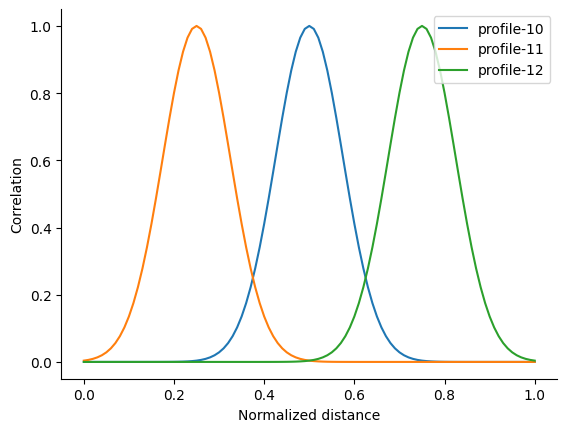

In [85]:
fig, ax = plt.subplots()

xx = np.linspace(0, 1, 101)

name = r"profile-10"
y  = np.exp(-0.5 *  ((x - 0.5) / 0.075)**2)
yy  = np.exp(-0.5 *  ((xx - 0.5) / 0.075)**2)
np.savetxt(f"../data/synthetic/synthetic_correlation_matrices/correlation-matrix-{name}.txt", y, fmt='%.6f')
ax.plot(xx, yy, label=name)

name = r"profile-11"
y  = np.exp(-0.5 *  ((x - 0.25) / 0.075)**2)
yy  = np.exp(-0.5 *  ((xx - 0.25) / 0.075)**2)
np.savetxt(f"../data/synthetic/synthetic_correlation_matrices/correlation-matrix-{name}.txt", y, fmt='%.6f')
ax.plot(xx, yy, label=name)

name = r"profile-12"
y  = np.exp(-0.5 *  ((x - 0.75) / 0.075)**2)
yy  = np.exp(-0.5 *  ((xx - 0.75) / 0.075)**2)
np.savetxt(f"../data/synthetic/synthetic_correlation_matrices/correlation-matrix-{name}.txt", y, fmt='%.6f')
ax.plot(xx, yy, label=name)

ax.set_xlabel("Normalized distance")
ax.set_ylabel("Correlation")

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.legend()
fig.savefig("../figures/profiles-10-11-12.pdf")